In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

In [2]:
import pandas as pd

In [4]:
# Load the dataset
df = pd.read_csv('Ecommerce Customers.csv')

In [5]:
# Preprocessing
df.columns = df.columns.str.replace(" ",  "_").str.replace(".", "")
df.rename(columns={"Time_on_App": "App_Usage", 
                   "Time_on_Website": "Website_Usage",
                   "Length_of_Membership": "Membership_Length",
                   "Yearly_Amount_Spent": "Yearly_Spent"}, inplace=True)


In [6]:
# Separate features and target variable
X = df[['Avg_Session_Length', 'App_Usage', 'Website_Usage', 'Membership_Length']]
y = df["Yearly_Spent"]


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=38)


In [8]:
# Define hyperparameters grid for each model
param_grid = {
    "Linear Regression": {},
    "Ridge Regression": {"alpha": [0.1, 0.5, 1.0]},
    "Lasso Regression": {"alpha": [0.1, 0.5, 1.0]},
    "ElasticNet Regression": {"alpha": [0.1, 0.5, 1.0], "l1_ratio": [0.1, 0.5, 0.9]}
}

In [14]:

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso()
}

Linear Regression Best Parameters: {}
Linear Regression Train Score: 0.984604163566385
Linear Regression Test Score: 0.9826517142555671
Linear Regression Error Ratio: 0.9219432463752762


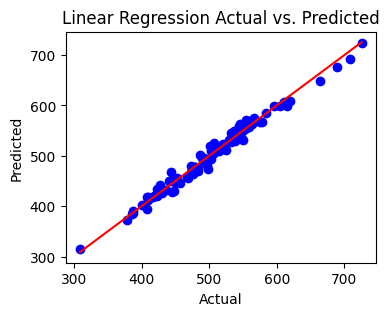

Ridge Regression Best Parameters: {'alpha': 0.1}
Ridge Regression Train Score: 0.9846041106427411
Ridge Regression Test Score: 0.9826478662337312
Ridge Regression Error Ratio: 0.922144572631726


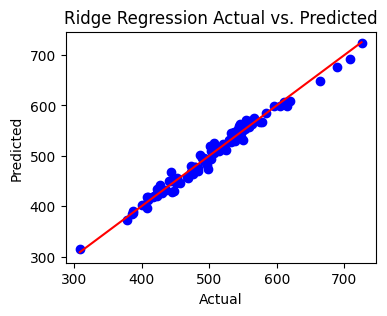

Lasso Regression Best Parameters: {'alpha': 0.1}
Lasso Regression Train Score: 0.9845984930188775
Lasso Regression Test Score: 0.9825570667371294
Lasso Regression Error Ratio: 0.9266318232291796


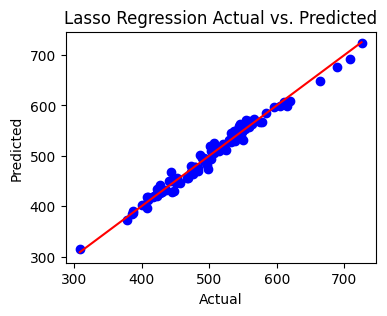

In [19]:
# Apply hyperparameter tuning and cross-validation
for name, model in models.items():
    # Create GridSearchCV object
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
    
    # Fit the GridSearchCV object
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Predict on the training set
    y_train_pred = best_model.predict(X_train)
    
    # Predict on the testing set
    y_test_pred = best_model.predict(X_test)
    
    # Calculate Mean Squared Error (MSE)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Calculate error ratio
    error_ratio = test_mse / train_mse
    
    # Print the model's name, best hyperparameters, train score, test score, and error ratio
    print(f"{name} Best Parameters: {grid_search.best_params_}")
    print(f"{name} Train Score: {best_model.score(X_train, y_train)}")
    print(f"{name} Test Score: {best_model.score(X_test, y_test)}")
    print(f"{name} Error Ratio: {error_ratio}")

# Plot actual vs. predicted values
    plt.figure(figsize=(4, 3))
    plt.scatter(y_test, y_test_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name} Actual vs. Predicted')
    plt.show()

In [20]:
best_algorithm = None
best_test_score = -float('inf')

# Apply hyperparameter tuning and cross-validation
for name, model in models.items():
    # Create GridSearchCV object
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
    
    # Fit the GridSearchCV object
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Calculate test score
    test_score = best_model.score(X_test, y_test)
    
    # Update the best algorithm if necessary
    if test_score > best_test_score:
        best_algorithm = name
        best_test_score = test_score

# Print the best algorithm
print(f"The best algorithm is: {best_algorithm} with a test score of {best_test_score}")


The best algorithm is: Linear Regression with a test score of 0.9826517142555671
